In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BrentOilPrices.csv')

In [3]:
d = pd.read_csv('BrentOilPrices.csv',index_col=0, parse_dates=True)

<Axes: xlabel='Date'>

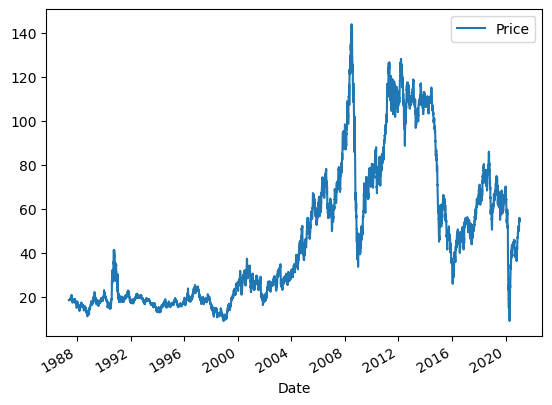

In [4]:
d.plot() # visualize the dataset in years

In [15]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
def day_maker(df):
    '''
    Pass a Time-series dataframe to it and it will returns a days column.
    Substracts dates and makes days
    '''
    days = []
    
    for d in range(len(df)):
        delta = df.index[d]-df.index[0]
        
        days.append(delta.days)
        
    days = np.array(days)
    
    return days
d['days'] = day_maker(d)

In [6]:
d.head()

,Price,days
Date,,
1987-05-20,18.63,0
1987-05-21,18.45,1
1987-05-22,18.55,2
1987-05-25,18.60,5
1987-05-26,18.63,6


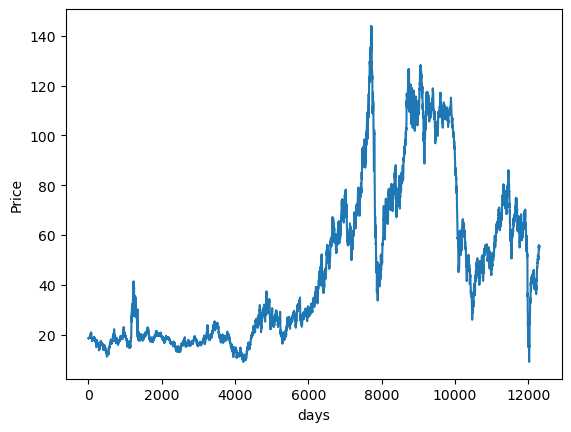

In [7]:
sns.lineplot(x=d['days'],y=d['Price'],data=d)
plt.show()

In [16]:
# check the shape of dataset
df.shape

(8554, 2)

In [17]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


<Figure size 2000x2000 with 0 Axes>

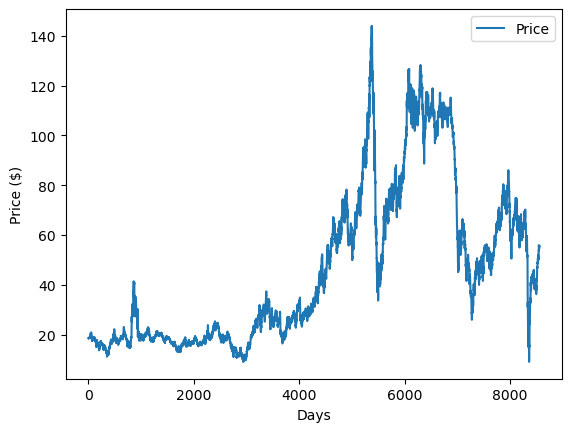

In [18]:
# visualize the whole data in days
plt.figure(figsize=(20,20))
df.plot()
plt.ylabel("Price ($)")
plt.xlabel("Days")
plt.show()

## Split the data as Train and Test

In [19]:
data = df['Price'].tolist() # convert dataframe to list
length_data = len(data) # rows the data has
split_ratio = 0.7 # 70% train and 30% validation

length_train = round(length_data * split_ratio)
length_validation = length_data-length_train

print("Data length: ",length_data)
print("Train data length: ", length_train)
print("Validation data length: ",length_validation)

Data length:  8554
Train data length:  5988
Validation data length:  2566


In [20]:
train_data = data[:length_train]
test_data = data[length_train:]

len(train_data), len(test_data)

(5988, 2566)

### Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# normalize the list data
train_scaled = scaler.fit_transform(np.array(train_data).reshape(-1,1))
train_scaled = train_scaled.flatten()

# normalize the test data

test_scaled = scaler.fit_transform(np.array(test_data).reshape(-1,1))
test_scaled = test_scaled.flatten()

In [22]:
train_scaled

array([0.07067112, 0.0693363 , 0.07007786, ..., 0.60571005, 0.59799778,
       0.59940675])

In [23]:
test_scaled

array([0.67568476, 0.68291044, 0.68484288, ..., 0.39119476, 0.38732986,
       0.38917829])

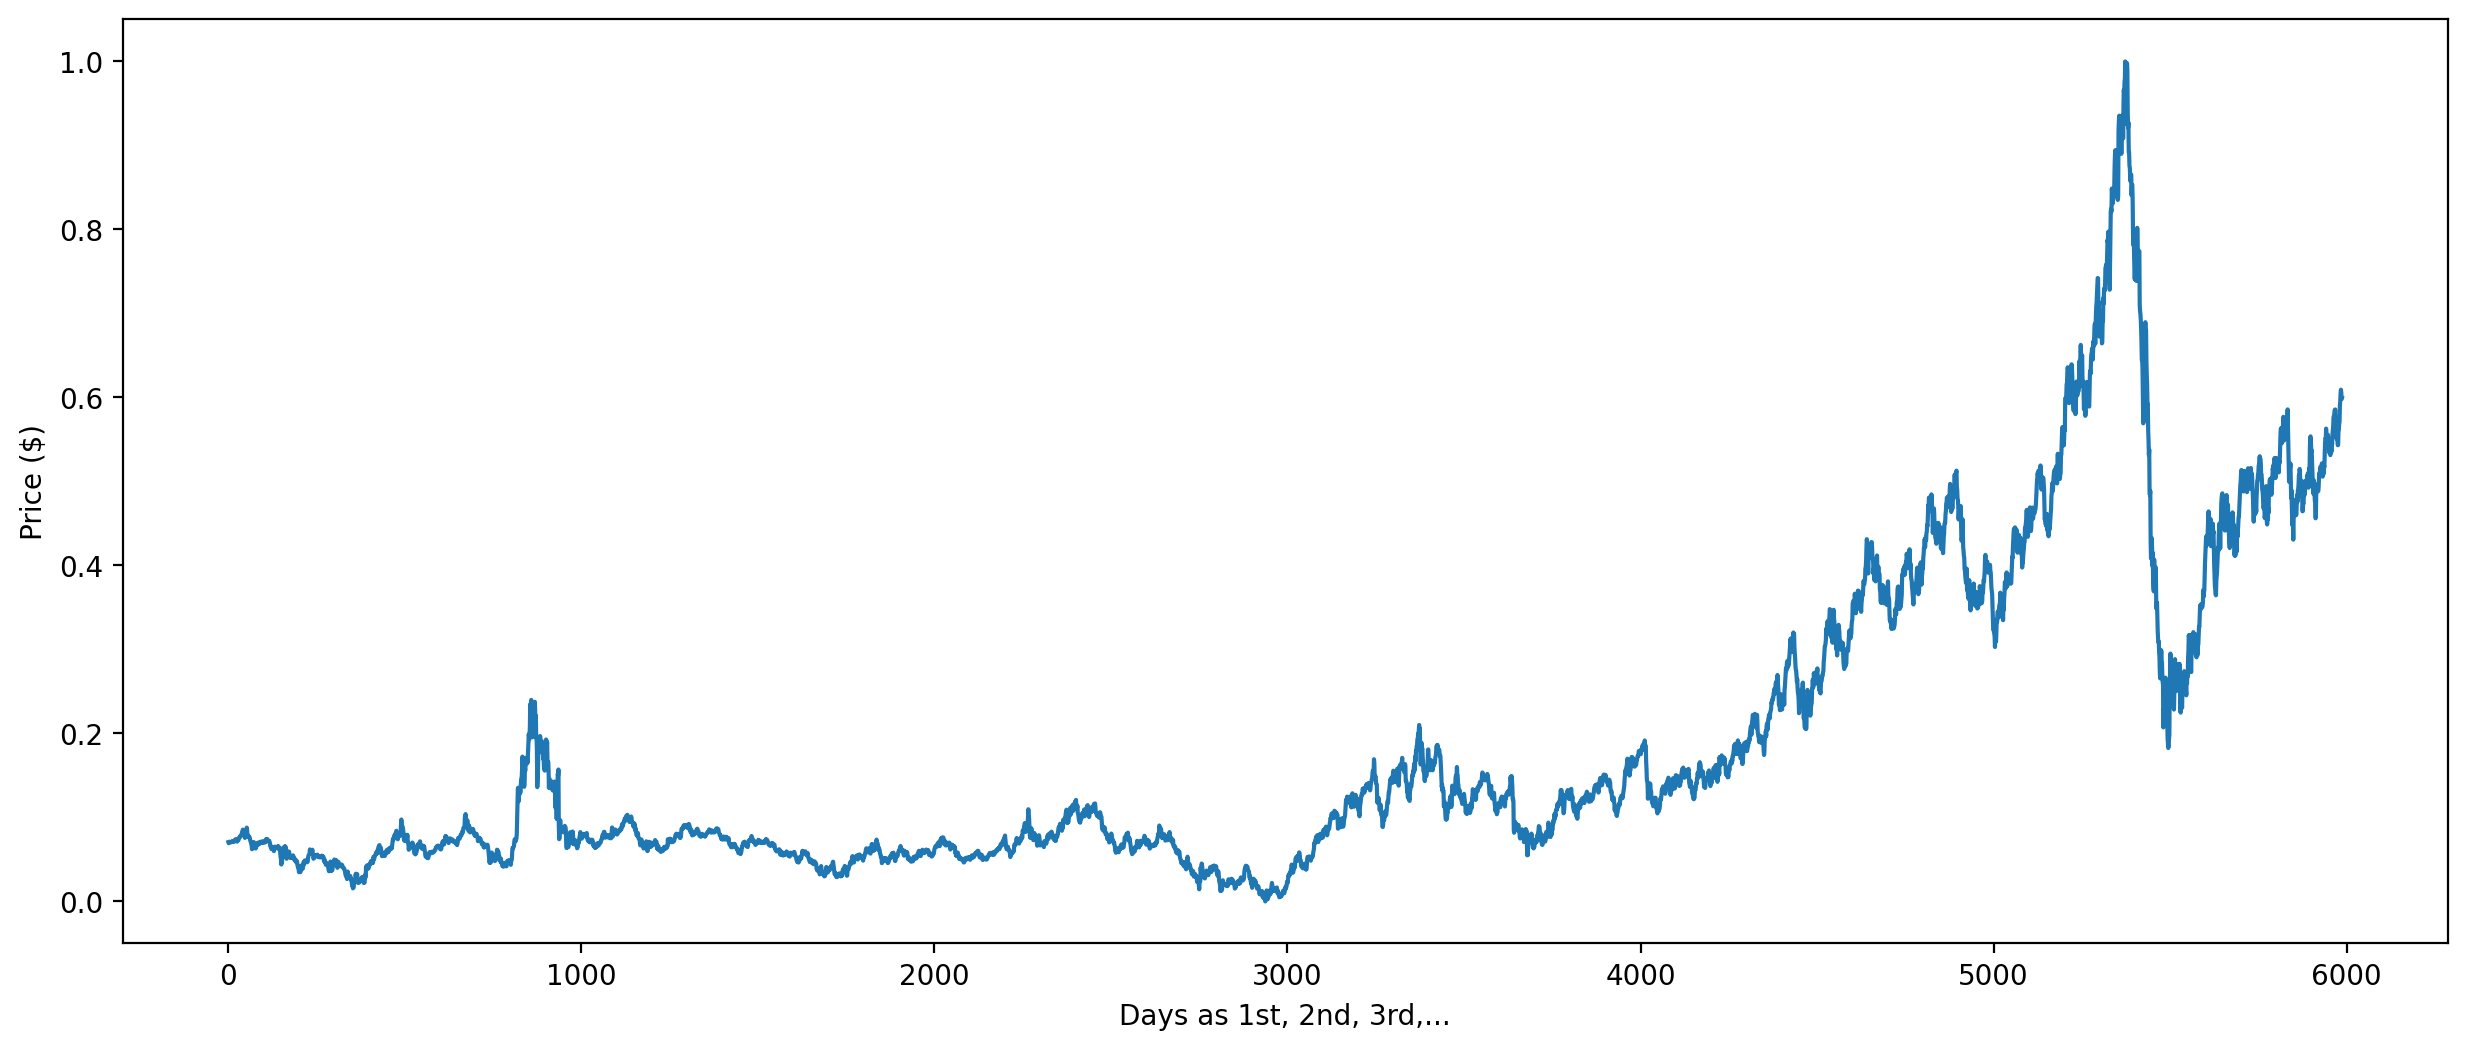

In [24]:
plt.rcParams["figure.figsize"] =(15,6)
plt.rcParams["figure.dpi"] = 200

plt.subplots(figsize=(15,6))
plt.plot(train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd,...")
plt.ylabel("Price ($)")
plt.show()

## Dataset Windowing


In [25]:
# create a function to process the data into 50 days look back slices

def windowed_dataset(data,window_size):
    X, y = [],[]
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size)])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [26]:
# process the train data into 50 days look back slices
window_size =50
X_train,y_train = windowed_dataset(train_scaled,window_size)

# process the test data into 50 day look back slices

X_test,y_test = windowed_dataset(test_scaled,window_size)


# print the shape of the training sets

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5937, 50), (5937,), (2515, 50), (2515,))

In [27]:
y_test

array([0.84565619, 0.88044026, 0.85993951, ..., 0.39102672, 0.39119476,
       0.38732986])

## Train ML model 

In [15]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
# model evaluation function

def evaluate_model(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    mse = print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    rmse= print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    r2score =r2_score(y_test,y_pred)
    print("R2 Score: ",r2score)
    y_test = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
    
    # plot the actual vs predicted price
    
    plt.plot(y_test,label='y_test')
    plt.plot(y_pred, color='orange',label='y_pred')
    plt.xlabel("Days")
    plt.ylabel("Brent Oil Price ($)")
    plt.legend()
    plt.show()
    
    return 
    

### Linear Regression

Mean Absolute Error: 0.008575198213238603
Mean Squared Error:  0.00013813435356585388
Root Mean Squared Error:  0.011753057200824554
R2 Score:  0.9976071002401399


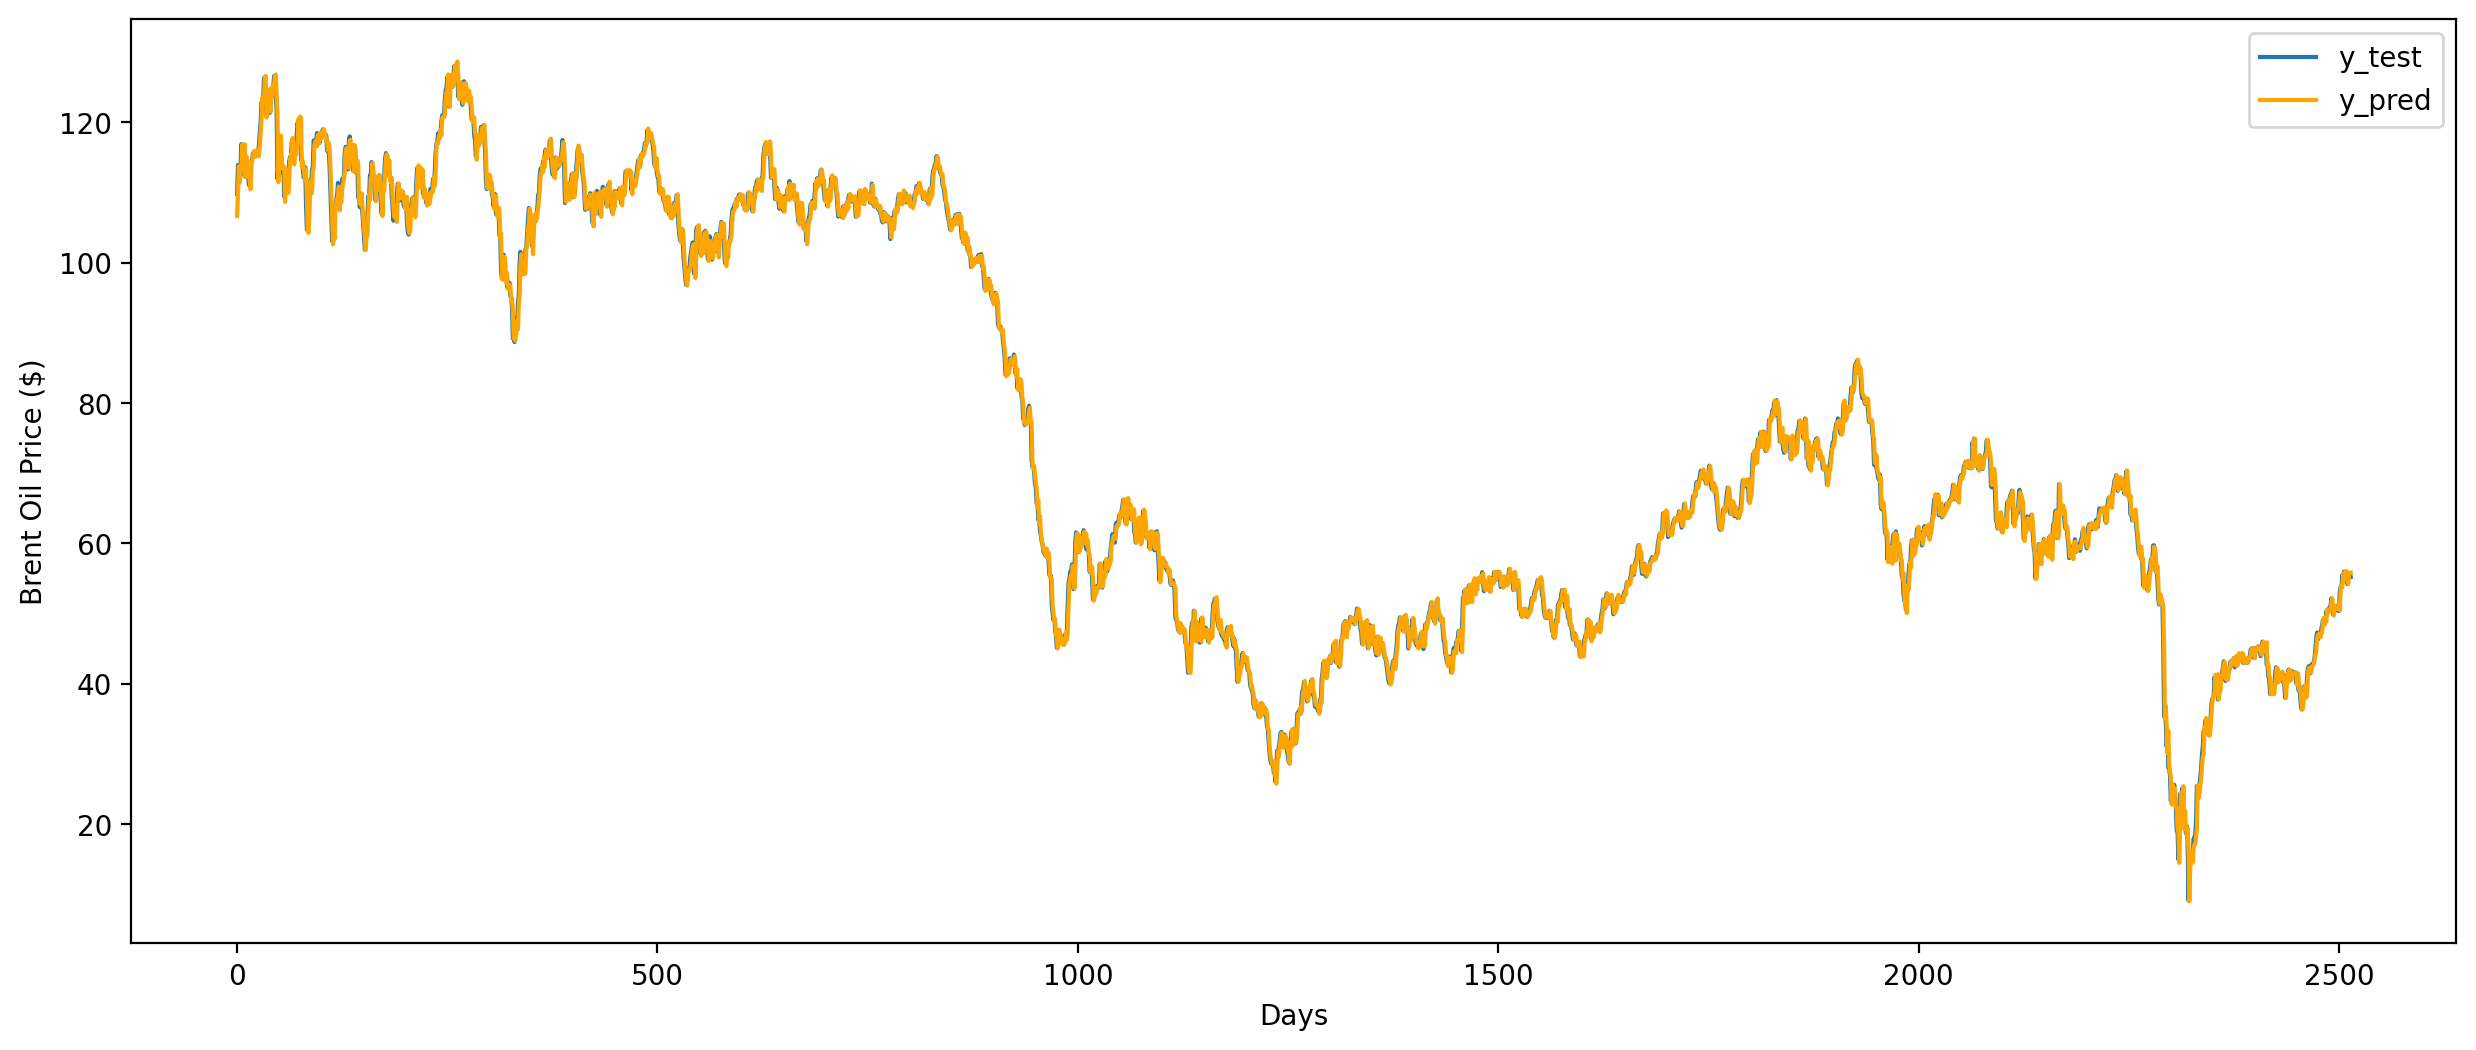

In [31]:
lr = LinearRegression()
evaluate_model(lr,X_train,y_train,X_test,y_test)

From all the models, Linear Regression model is having the highest r2 score = 0.9976

## SVR

Mean Absolute Error: 0.03397577108757081
Mean Squared Error:  0.002270480878135325
Root Mean Squared Error:  0.04764956325230405
R2 Score:  0.9606684868187635


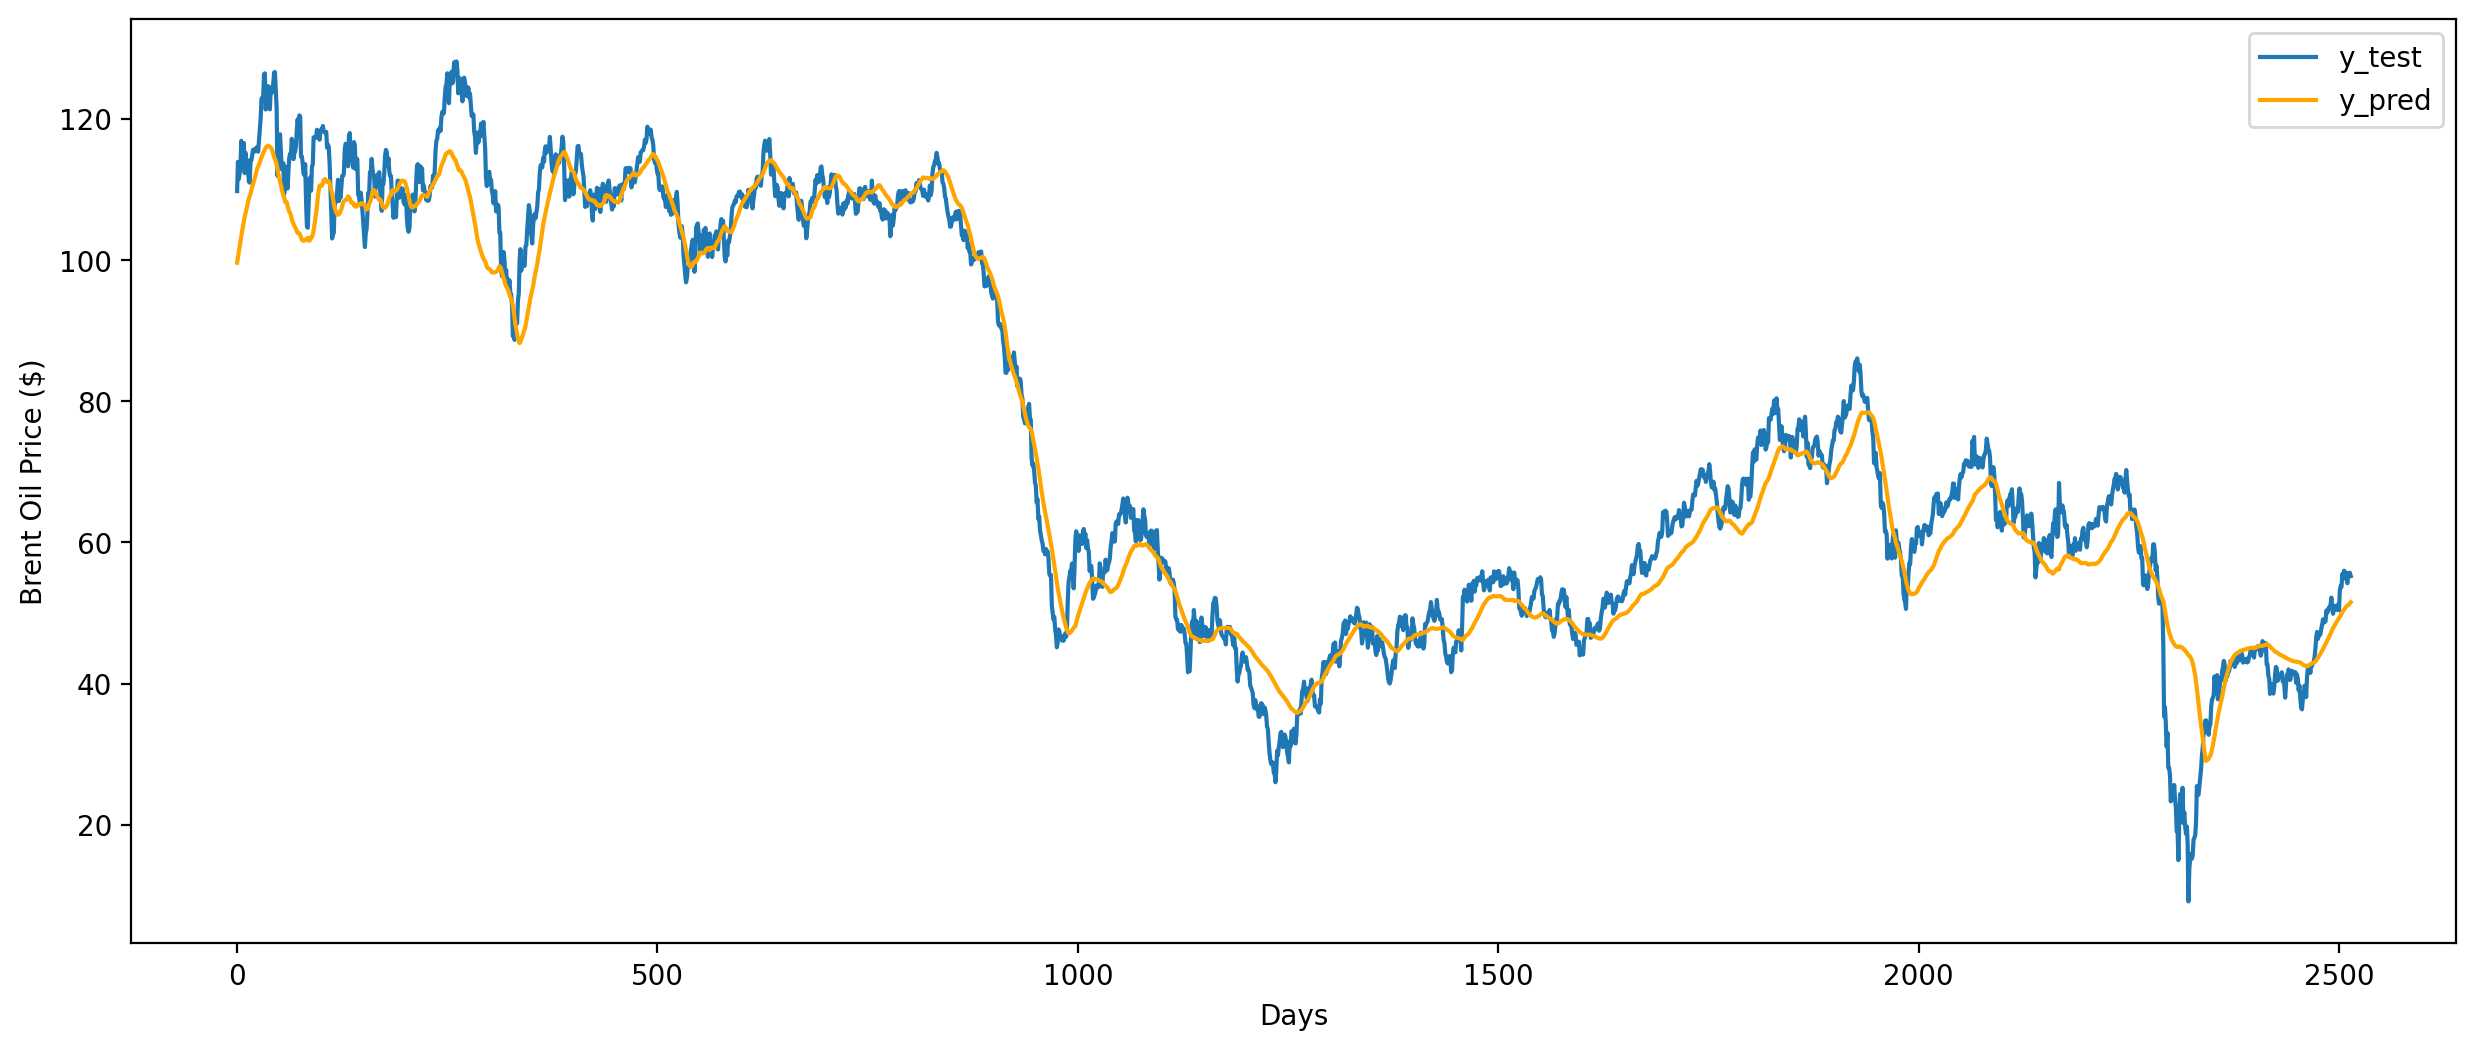

In [32]:
svr = SVR()
evaluate_model(svr,X_train,y_train,X_test,y_test)

## Random Forest Regressor

Mean Absolute Error: 0.009984693288445158
Mean Squared Error:  0.00017850284400257874
Root Mean Squared Error:  0.013360495649584964
R2 Score:  0.9969077973616137


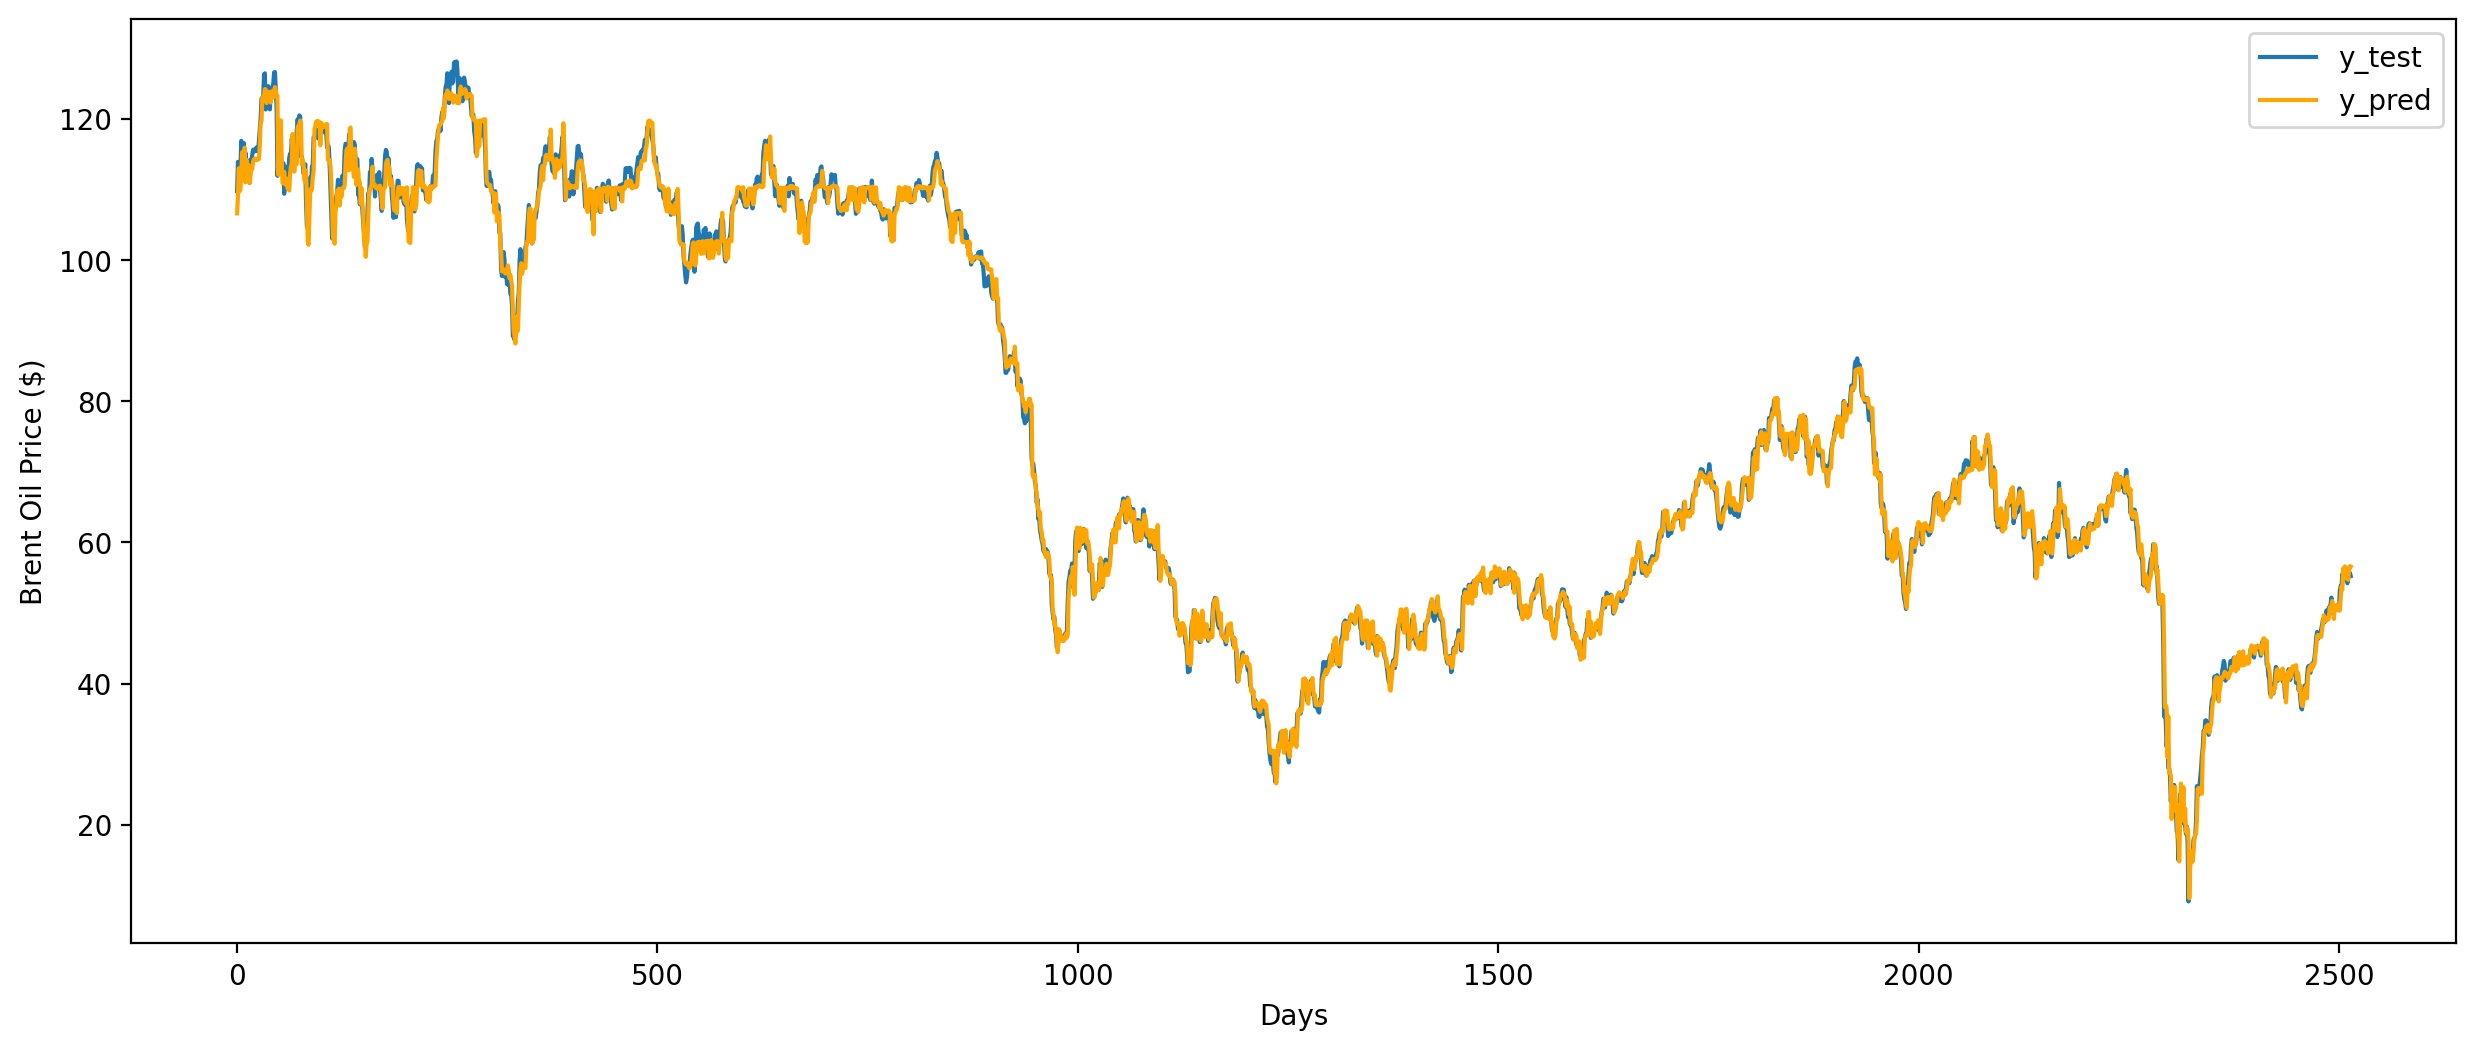

In [33]:
rf = RandomForestRegressor()
evaluate_model(rf,X_train,y_train,X_test,y_test)

## AdaboostRegressor

Mean Absolute Error: 0.011529043591065422
Mean Squared Error:  0.00022899045139320527
Root Mean Squared Error:  0.015132430452283773
R2 Score:  0.9960332011407442


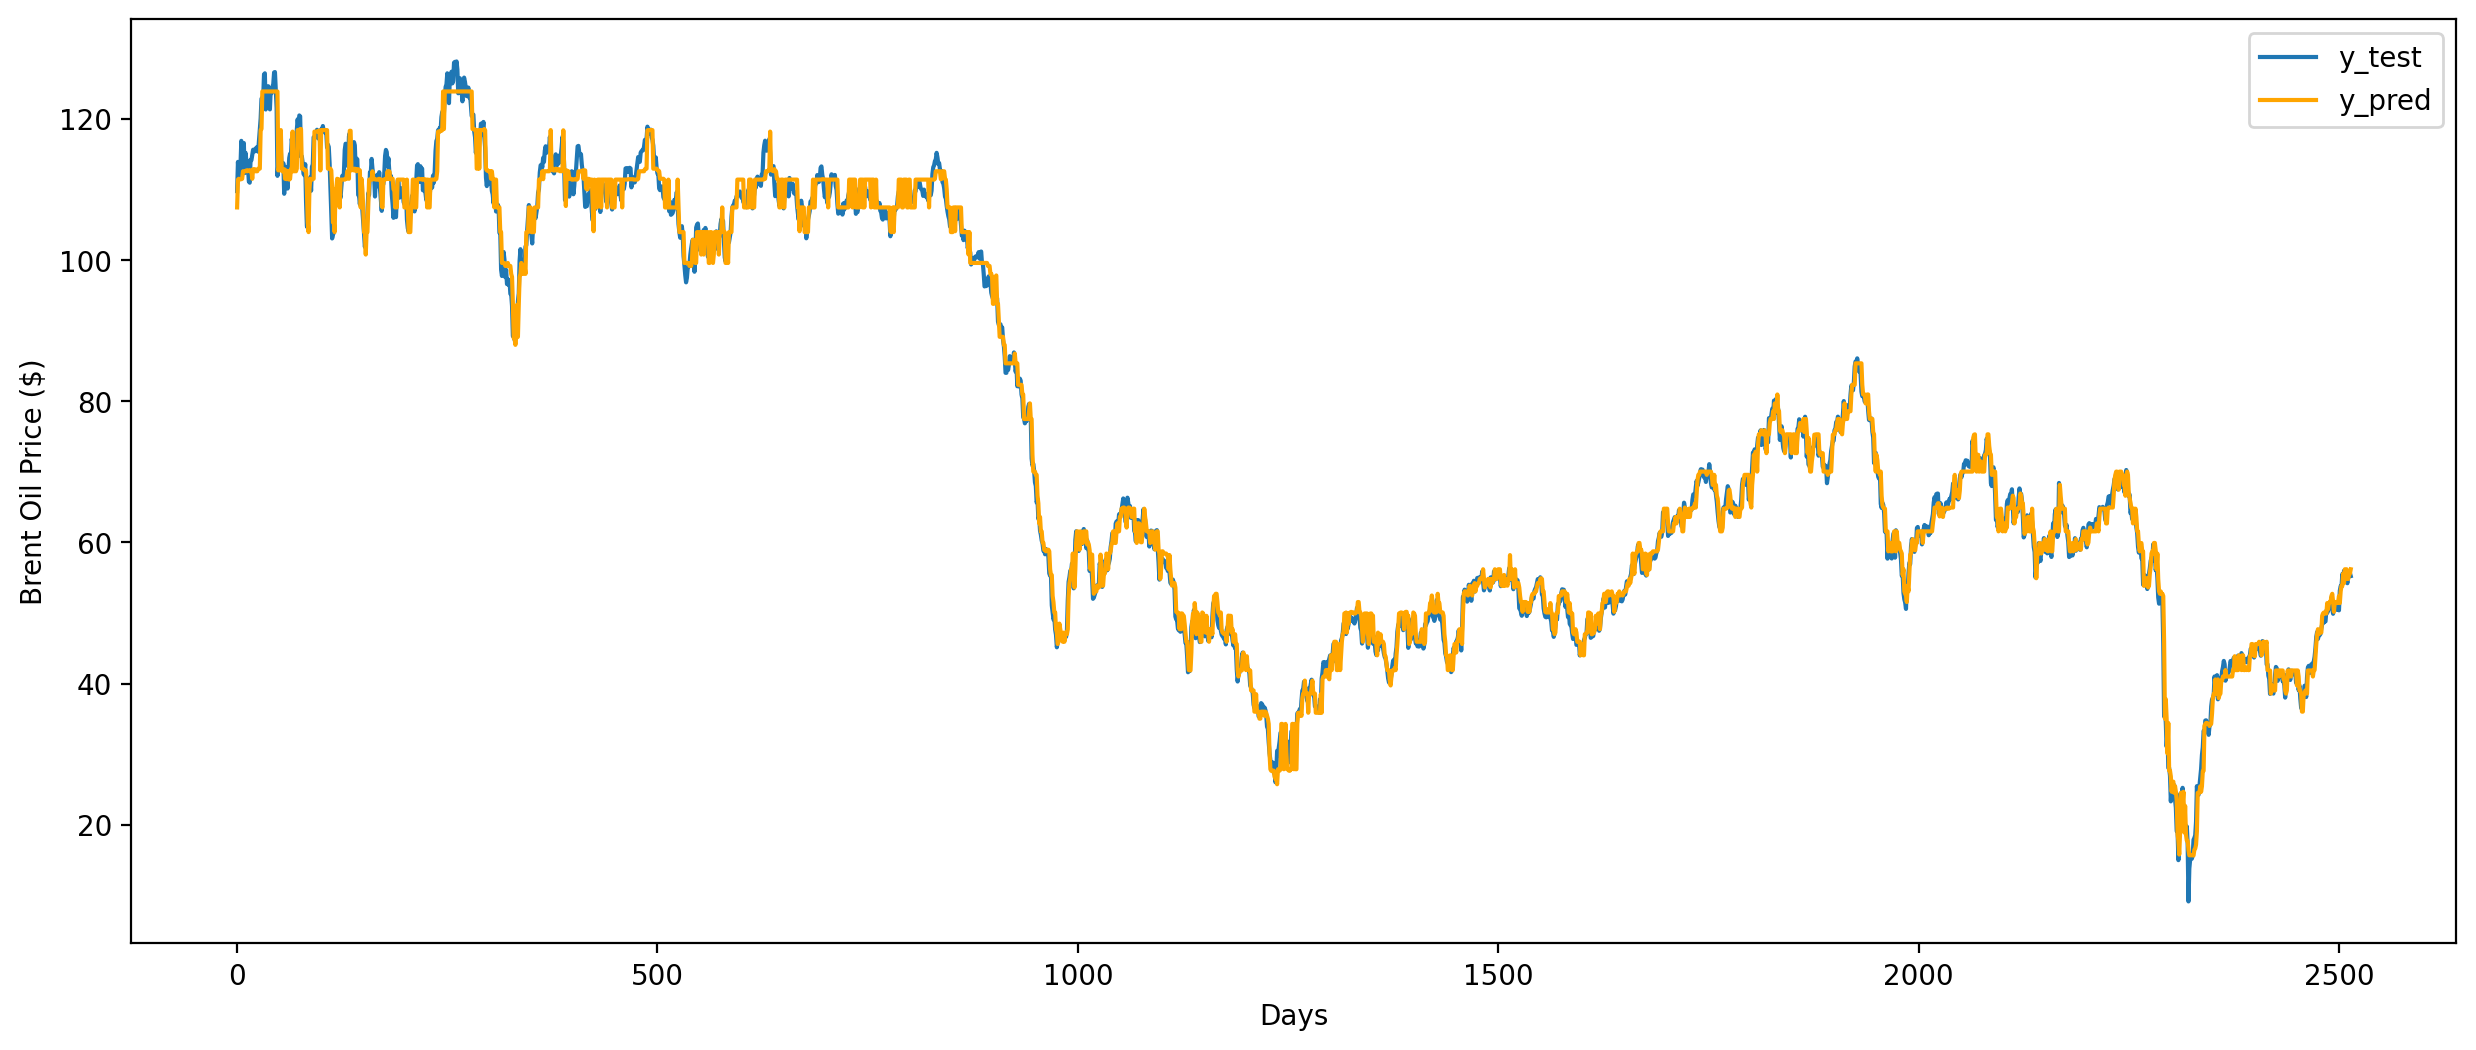

In [34]:
adr = AdaBoostRegressor()
evaluate_model(adr,X_train,y_train,X_test,y_test)

## Ridge

Mean Absolute Error: 0.010741749589071033
Mean Squared Error:  0.00020808020966636698
Root Mean Squared Error:  0.014424985603679713
R2 Score:  0.9963954290088677


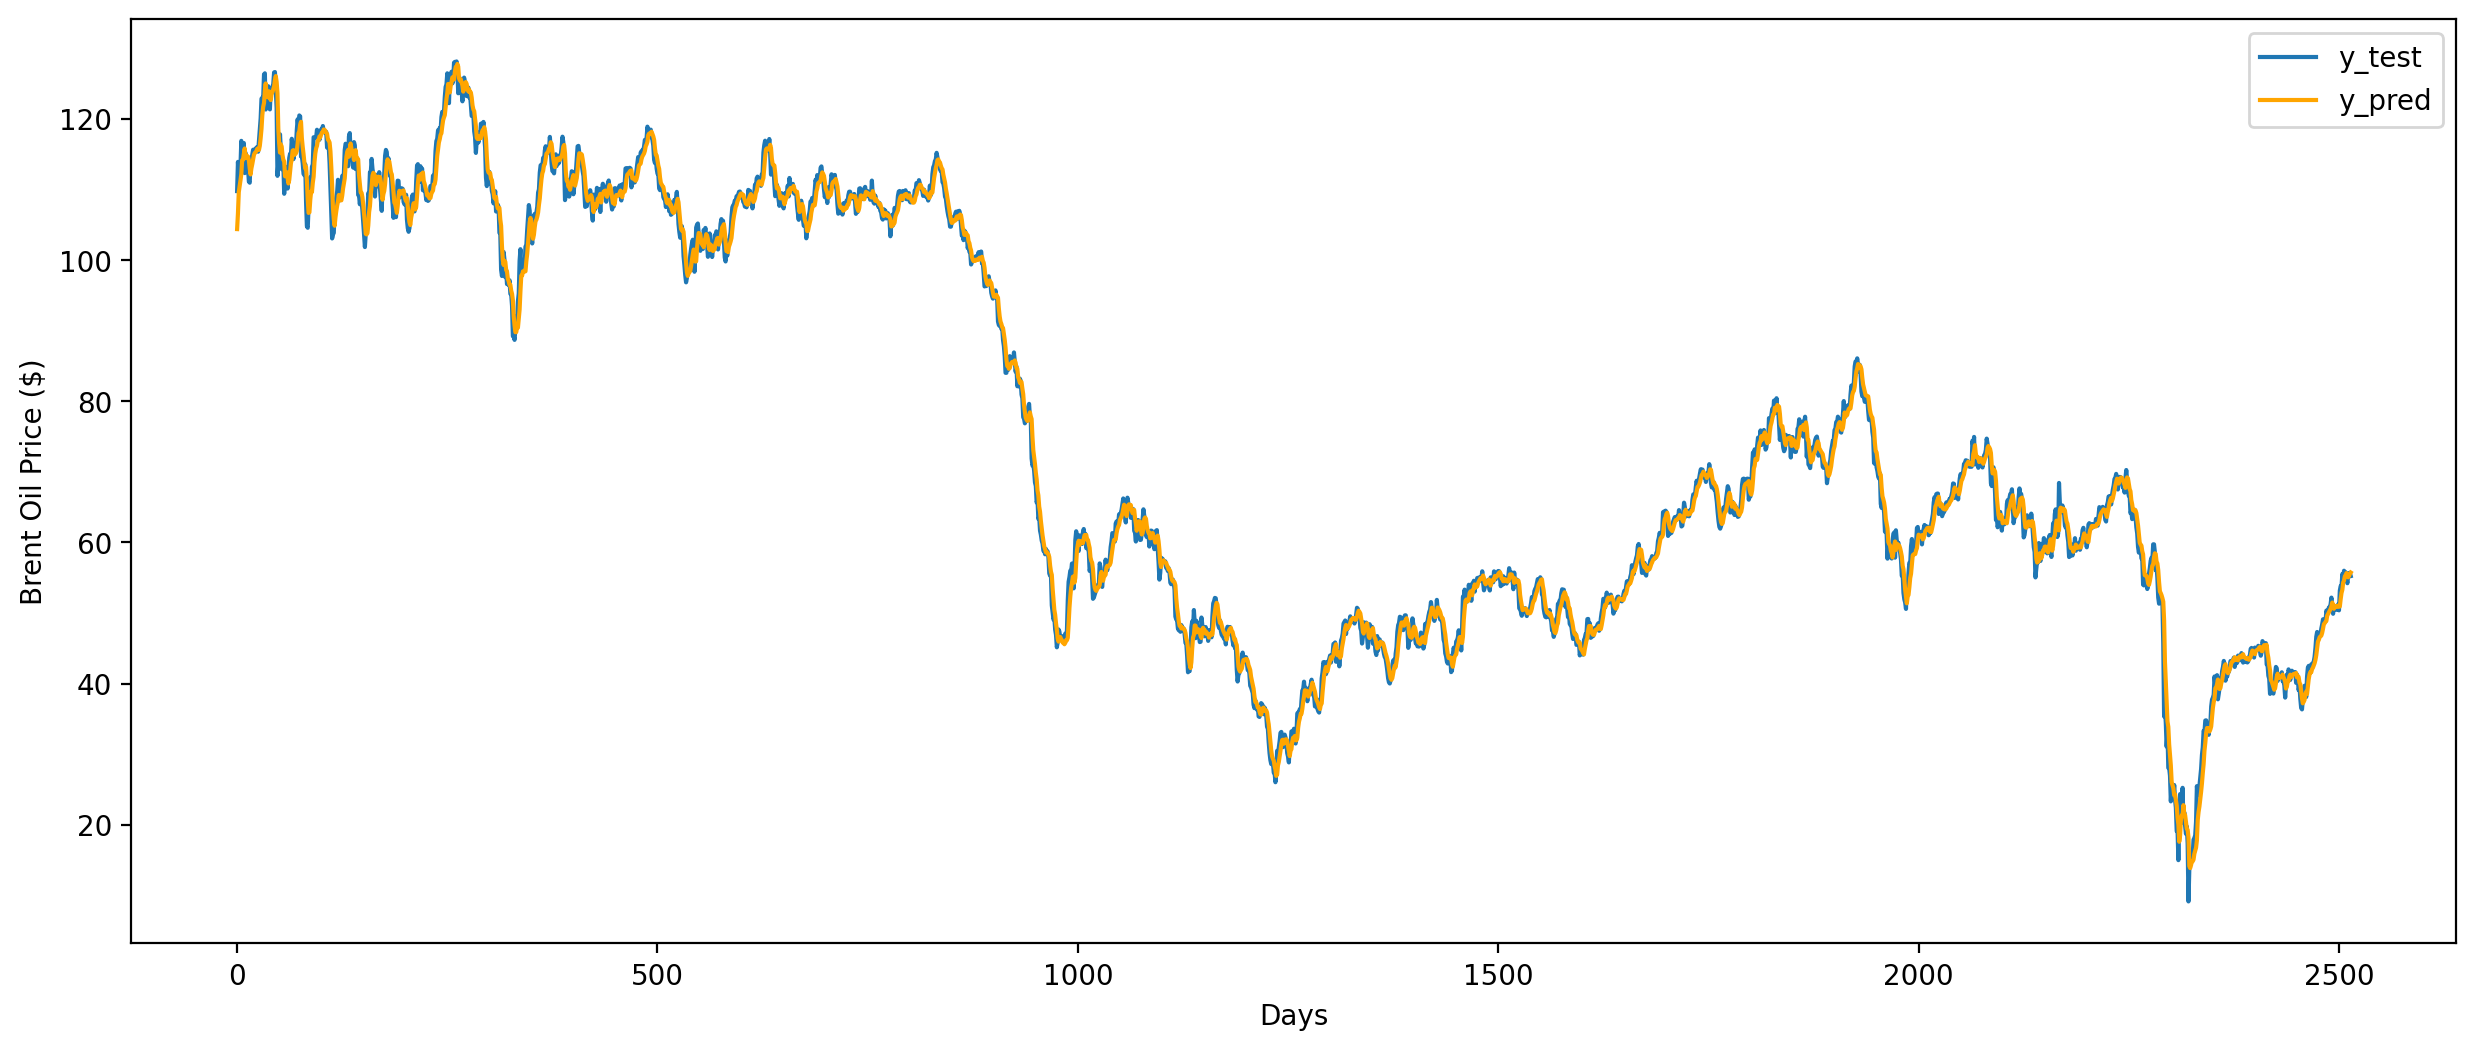

In [35]:
ridge = Ridge()
evaluate_model(ridge,X_train,y_train,X_test,y_test)

## Decision Tree Regressor


Mean Absolute Error: 0.015182826222121887
Mean Squared Error:  0.00039480201926056003
Root Mean Squared Error:  0.01986962554404486
R2 Score:  0.9931608493275318


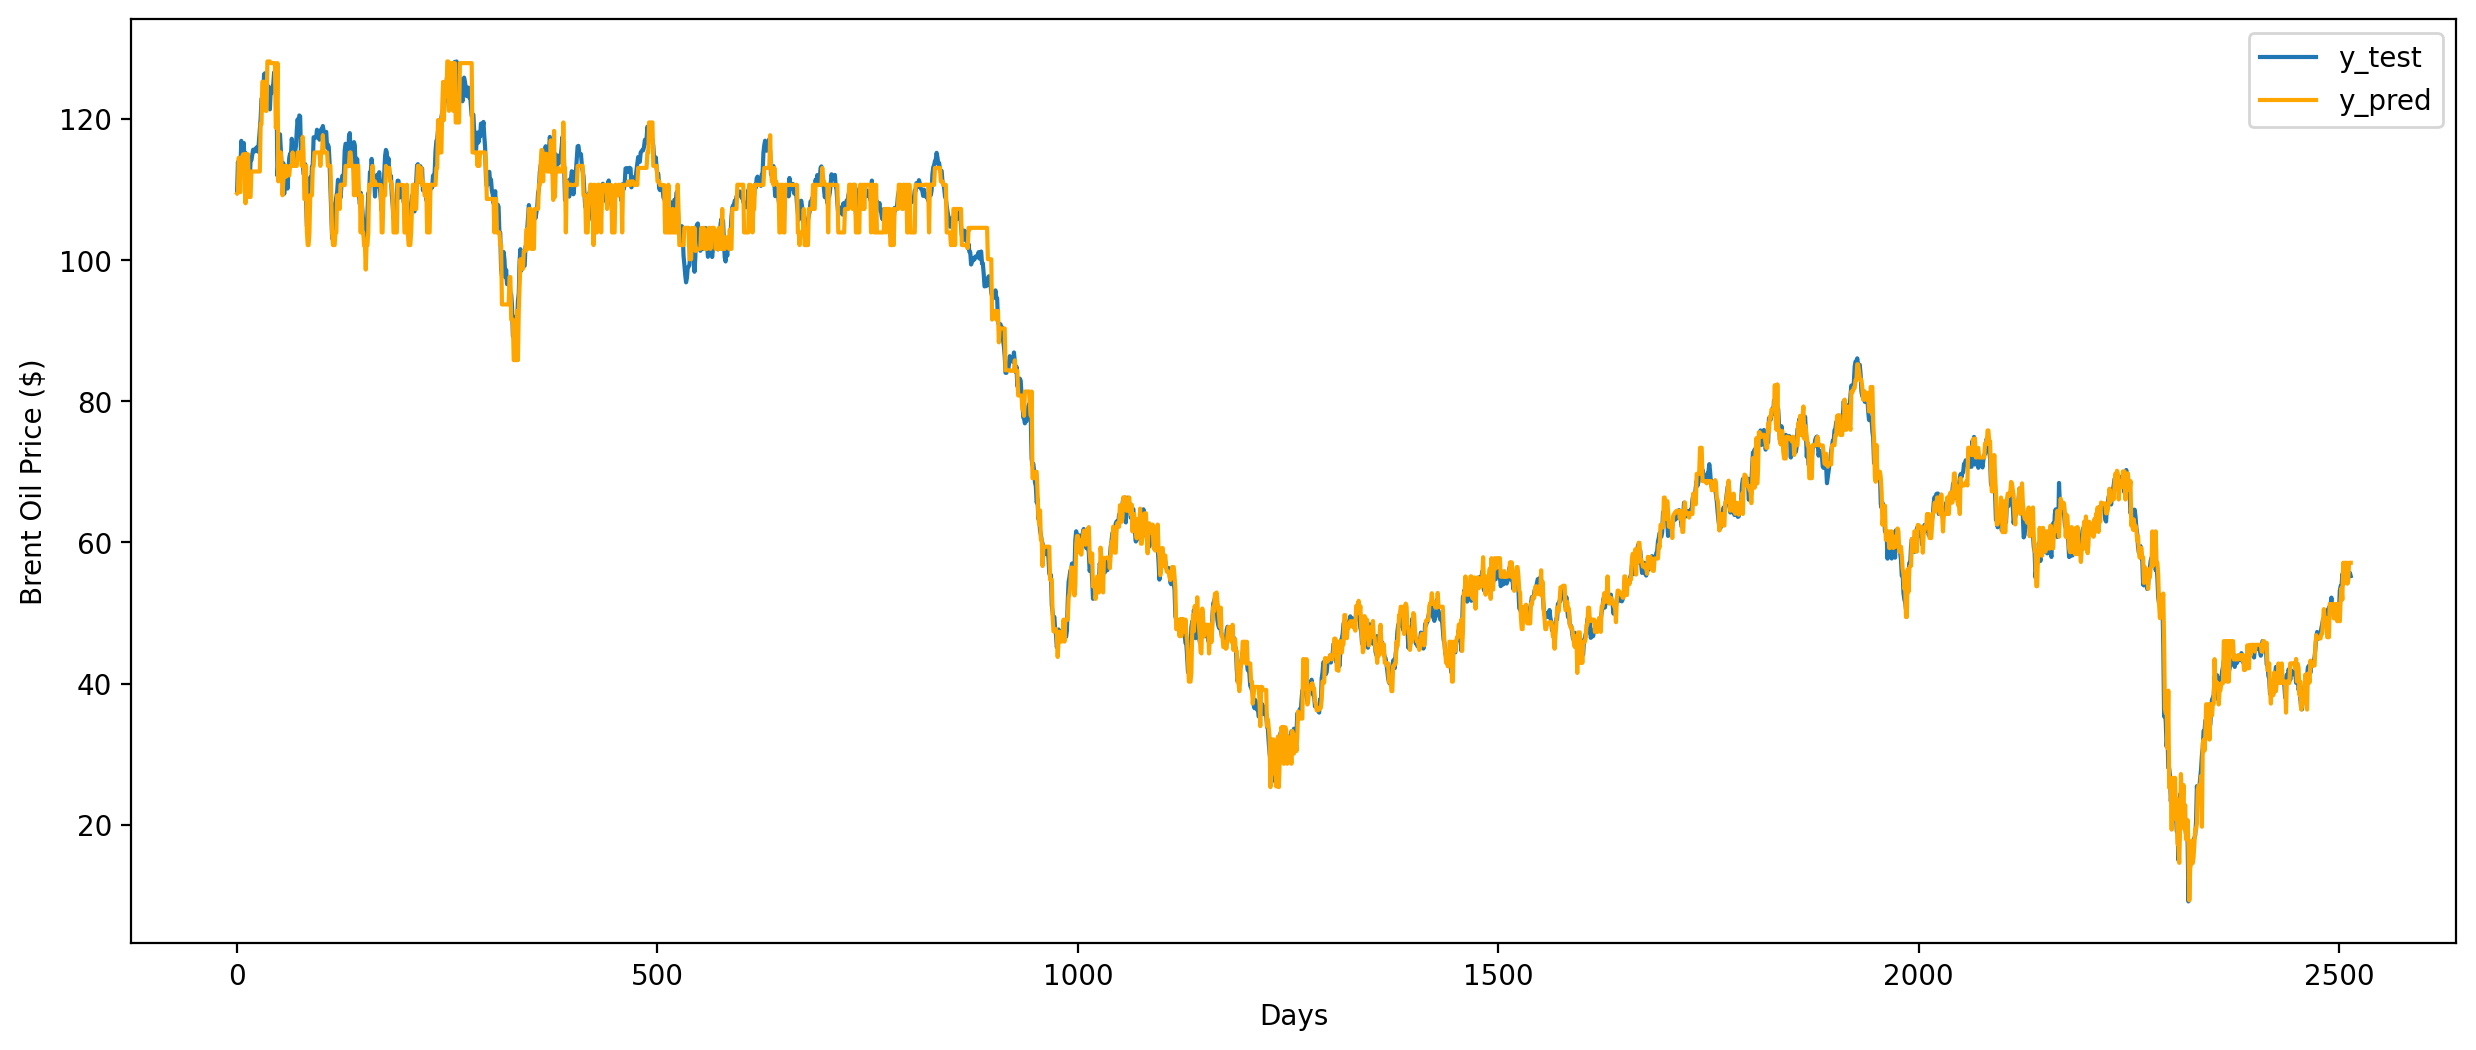

In [36]:
dtree = DecisionTreeRegressor()
evaluate_model(dtree,X_train,y_train,X_test,y_test)

## KNN

Mean Absolute Error: 0.04598560900794406
Mean Squared Error:  0.0036582006147822645
Root Mean Squared Error:  0.06048306056064181
R2 Score:  0.9366290343664632


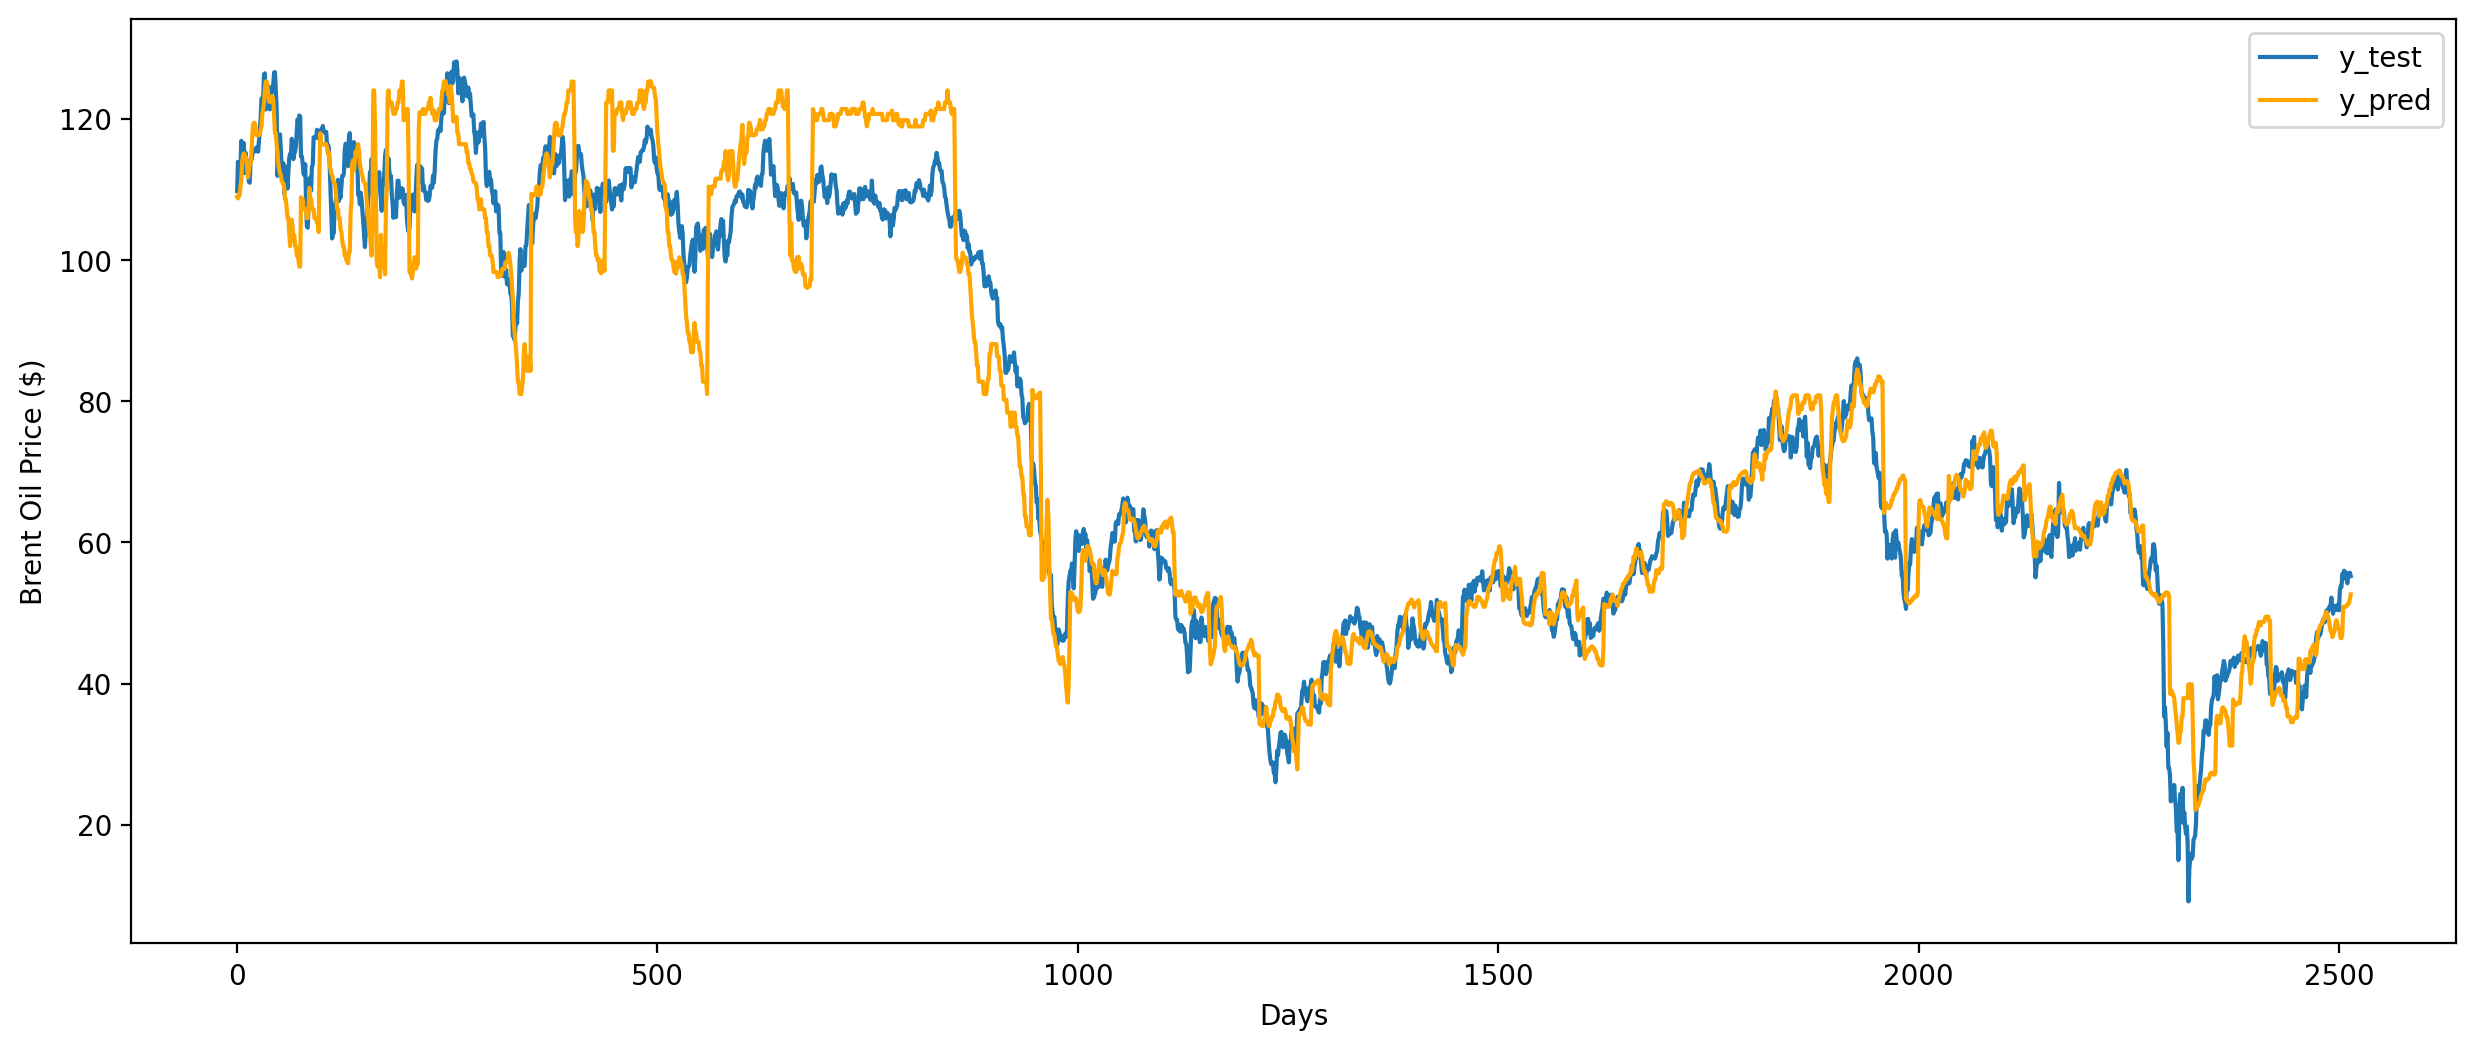

In [37]:
knn = KNeighborsRegressor()
evaluate_model(knn,X_train,y_train,X_test,y_test)

## GradientBoostRegressor

Mean Absolute Error: 0.009925273127222169
Mean Squared Error:  0.00017848586243627662
Root Mean Squared Error:  0.013359860120385866
R2 Score:  0.9969080915330844


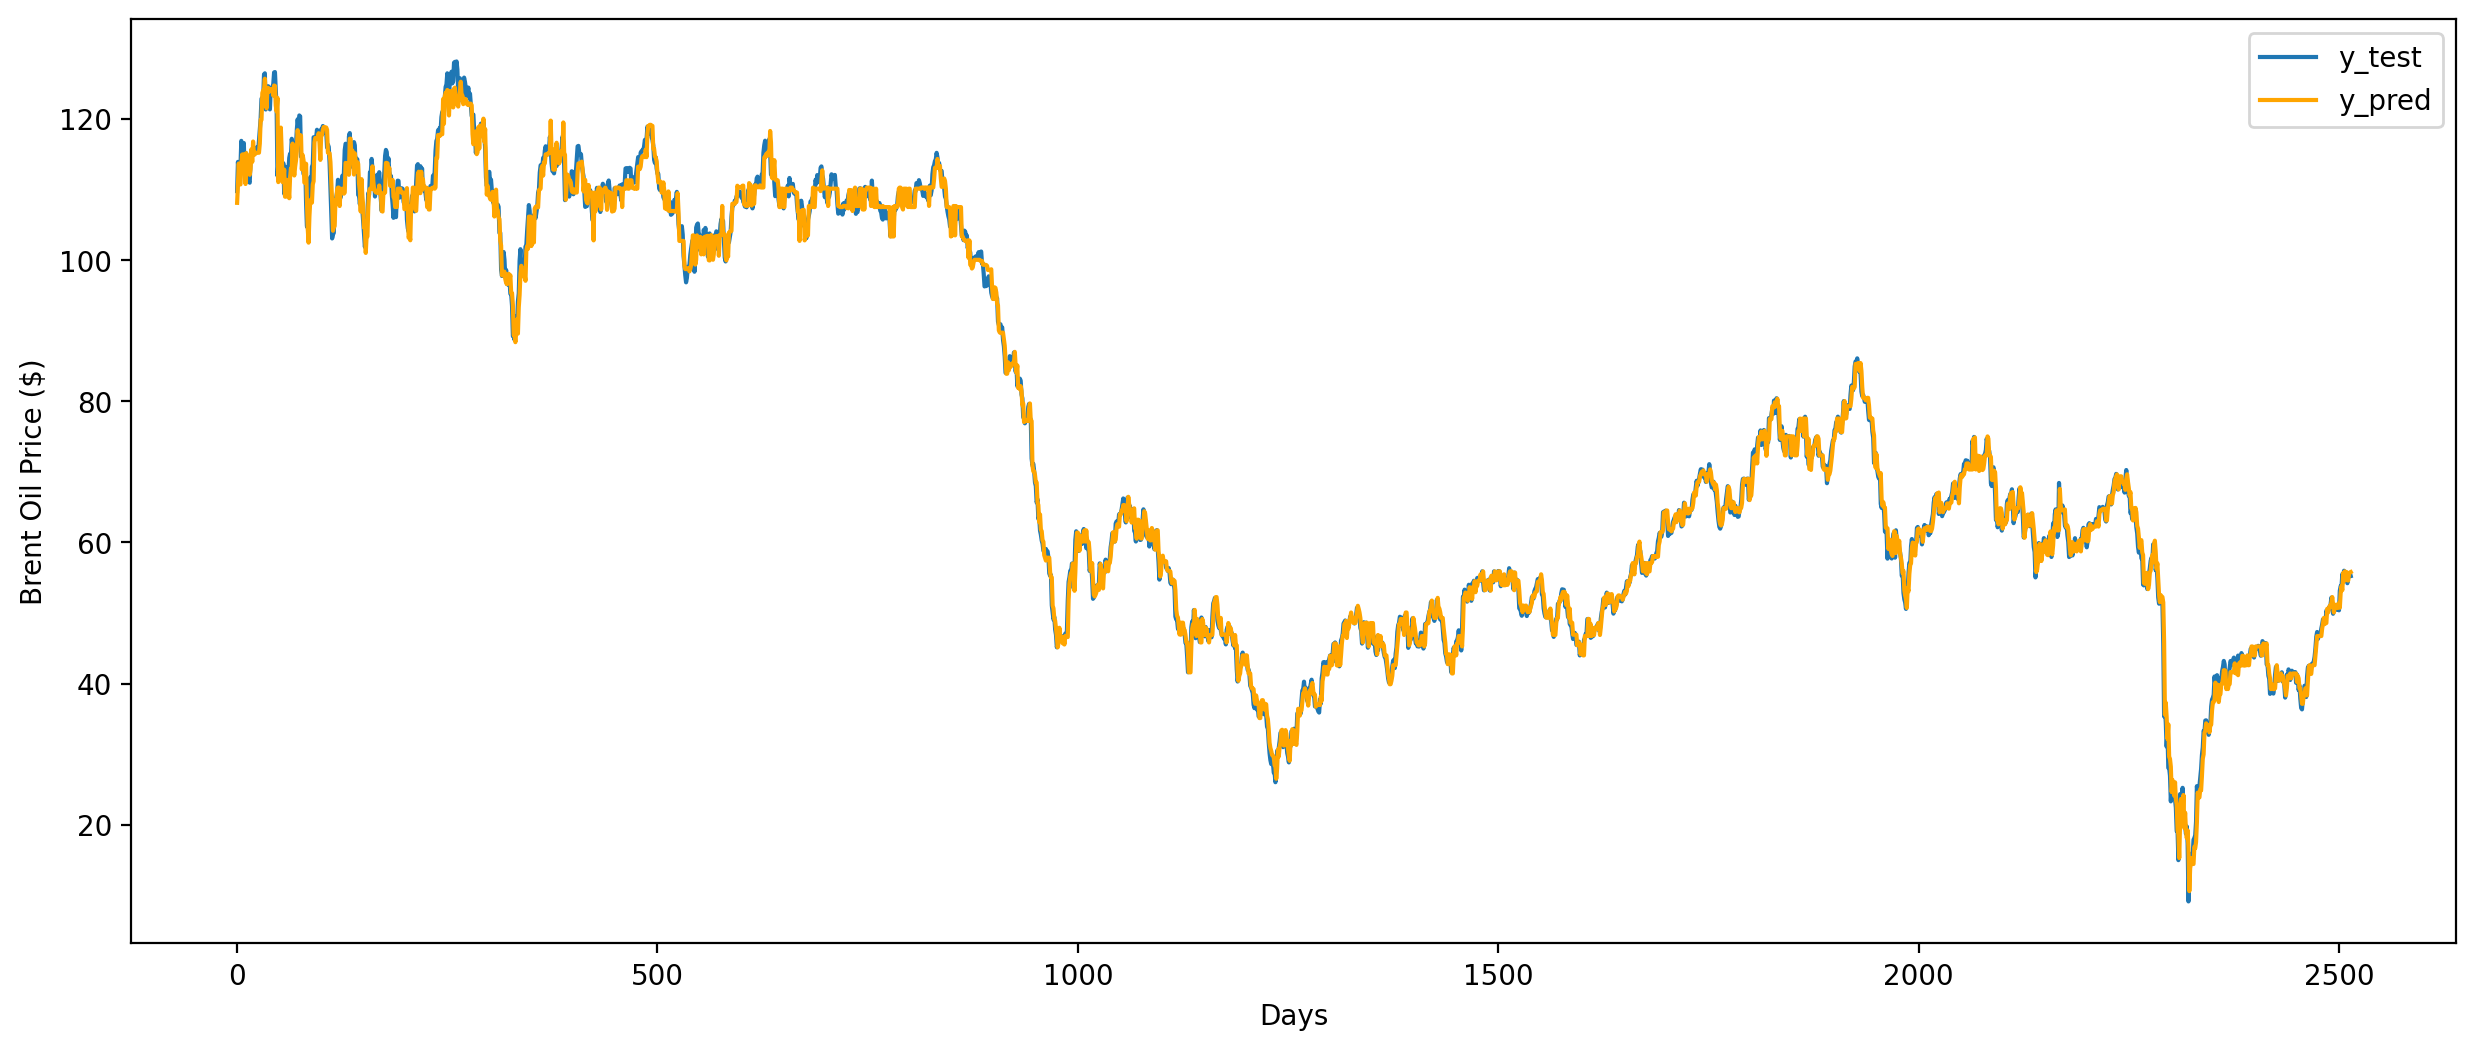

In [38]:
gbr = GradientBoostingRegressor()
evaluate_model(gbr,X_train,y_train,X_test,y_test)

## Save the best model

In [39]:
lr= LinearRegression()
model =lr.fit(X_train,y_train)
ypred = model.predict(X_test)

In [2]:
import joblib

In [40]:
# Save model and scaler as pkl file
joblib.dump(model,"BrentOilPrice_lr_model.pkl")
joblib.dump(scaler,"LR_model_Scaler.pkl")

['LR_model_Scaler.pkl']

# Use the model to predict price of natural gas

In [3]:
ng_data = pd.read_csv('Natural_Gas_Pricing_DataSet.csv')

In [4]:
ng_data.head()

,Date,Value
0,01-1997,5.25
1,02-1997,2.86
2,03-1997,2.95
3,04-1997,3.45
4,05-1997,3.57


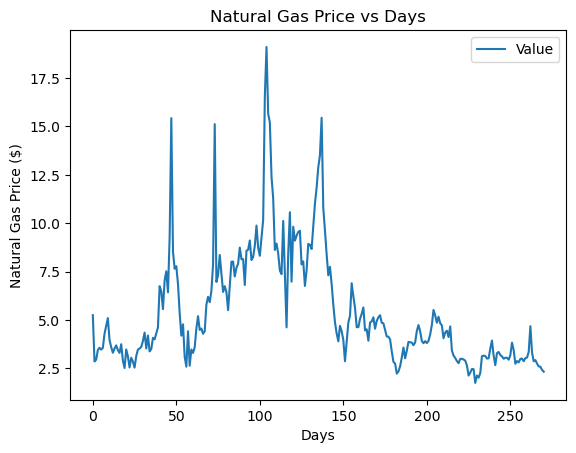

In [5]:
# Visualize the Natural Gas price dataset
ng_data.plot()
plt.xlabel("Days")
plt.ylabel("Natural Gas Price ($)")
plt.title("Natural Gas Price vs Days")
plt.legend()
plt.show()

In [6]:
ng_value=ng_data['Value'].tolist() # convert the dataframe to list

In [7]:
# normalize the data
# load scaler
scaler = joblib.load('LR_model_Scaler.pkl')
ng_value_scaled = scaler.fit_transform(np.array(ng_value).reshape(-1,1))
ng_value_scaled= ng_value_scaled.flatten()

In [8]:
#ng_value_scaled

In [9]:
def windowing(data, window_size):
    X,y = [],[]
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size)])
        y.append(data[i+window_size])
    return np.array(X),np.array(y)
# create windows for the dataset
new_X,new_y = windowing(ng_value_scaled,50)

In [12]:
# make prediction

model = joblib.load("BrentOilPrice_lr_model.pkl")
predicted_ng_price = model.predict(new_X)
#predicted_ng_price # predicted natural gas price


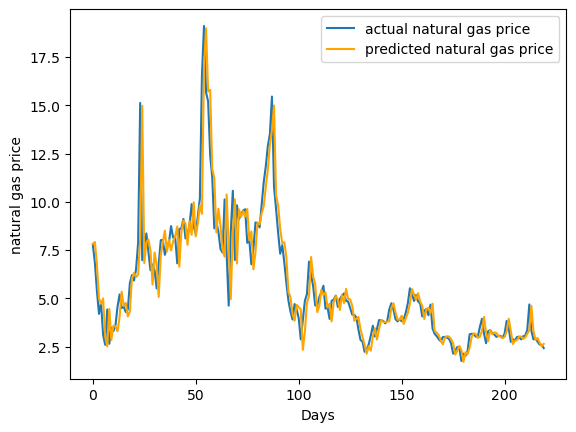

In [13]:
new_y = scaler.inverse_transform(new_y.reshape(-1,1))
predicted_ng_price = scaler.inverse_transform(predicted_ng_price.reshape(-1,1))
    
# plot the actual vs predicted price
    
plt.plot(new_y,label='actual natural gas price')
plt.plot(predicted_ng_price, color='orange',label='predicted natural gas price')
plt.xlabel("Days")
plt.ylabel("natural gas price")
plt.legend()
plt.show()

## Check prediction R2 score

In [16]:
r2 =r2_score(new_y,predicted_ng_price)
print("R2 Score: ",r2)

R2 Score:  0.8093683894124049
